# jupyter-pandas-test

Using this notebook to practice using a dataset from Kaggle and performing some exploratory data analysis using pandas dataframes. Dataset used can be downloaded on https://www.kaggle.com/c/home-data-for-ml-course/data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("train.csv") # Kaggle dataset "Housing Prices Competition for Kaggle Learn Users"
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [3]:
print(df.shape) # 1460 rows, 81 columns
print(df.dtypes)

(1460, 81)
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt   

In [4]:
df_empty = df[df.columns[df.isnull().any()]] # Check how many values/cells are empty for each column
print(df_empty.isnull().sum())

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [5]:
df.mean()

Id                  730.500000
MSSubClass           56.897260
LotFrontage          70.049958
LotArea           10516.828082
OverallQual           6.099315
OverallCond           5.575342
YearBuilt          1971.267808
YearRemodAdd       1984.865753
MasVnrArea          103.685262
BsmtFinSF1          443.639726
BsmtFinSF2           46.549315
BsmtUnfSF           567.240411
TotalBsmtSF        1057.429452
1stFlrSF           1162.626712
2ndFlrSF            346.992466
LowQualFinSF          5.844521
GrLivArea          1515.463699
BsmtFullBath          0.425342
BsmtHalfBath          0.057534
FullBath              1.565068
HalfBath              0.382877
BedroomAbvGr          2.866438
KitchenAbvGr          1.046575
TotRmsAbvGrd          6.517808
Fireplaces            0.613014
GarageYrBlt        1978.506164
GarageCars            1.767123
GarageArea          472.980137
WoodDeckSF           94.244521
OpenPorchSF          46.660274
EnclosedPorch        21.954110
3SsnPorch             3.409589
ScreenPo

In [6]:
# Choose to investigate these continuous features first
cont_columns = ['LotFrontage',
                'LotArea',
                'BsmtFinSF1',
                'BsmtFinSF2',
                'BsmtUnfSF',
                'TotalBsmtSF',
                '1stFlrSF',
                '2ndFlrSF',
                'LowQualFinSF',
                'GrLivArea',
                'GarageArea',
                'WoodDeckSF',
                'OpenPorchSF',
                'EnclosedPorch',
                '3SsnPorch',
                'ScreenPorch',
                'PoolArea',
                'MiscVal',
                'SalePrice']

In [7]:
df_cont = df[cont_columns] 
df_cont.head()

LotFrontage  LotArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0         65.0     8450         706           0        150          856   
1         80.0     9600         978           0        284         1262   
2         68.0    11250         486           0        434          920   
3         60.0     9550         216           0        540          756   
4         84.0    14260         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  GarageArea  WoodDeckSF  \
0       856       854             0       1710         548           0   
1      1262         0             0       1262         460         298   
2       920       866             0       1786         608           0   
3       961       756             0       1717         642           0   
4      1145      1053             0       2198         836         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

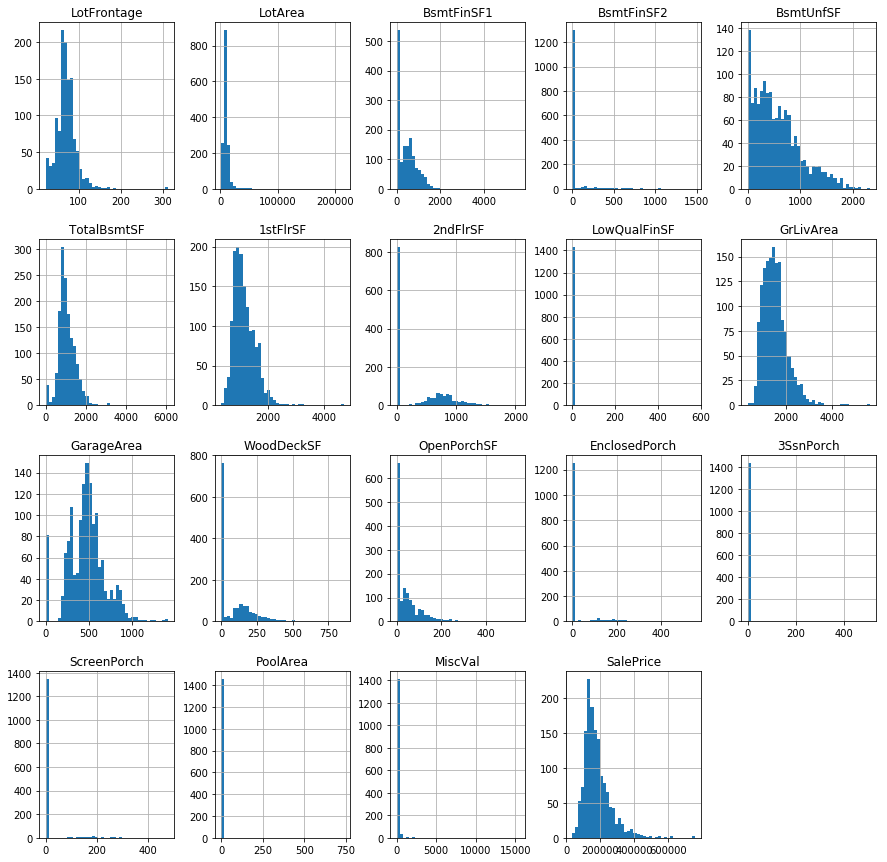

In [8]:
nrows, ncols = 4, 5

fig = plt.figure(figsize=(15,15))
for i, column in enumerate(df_cont):
    ax = fig.add_subplot(nrows, ncols, i+1)
    df_cont.hist(column, ax=ax, bins=40)
    
plt.show()

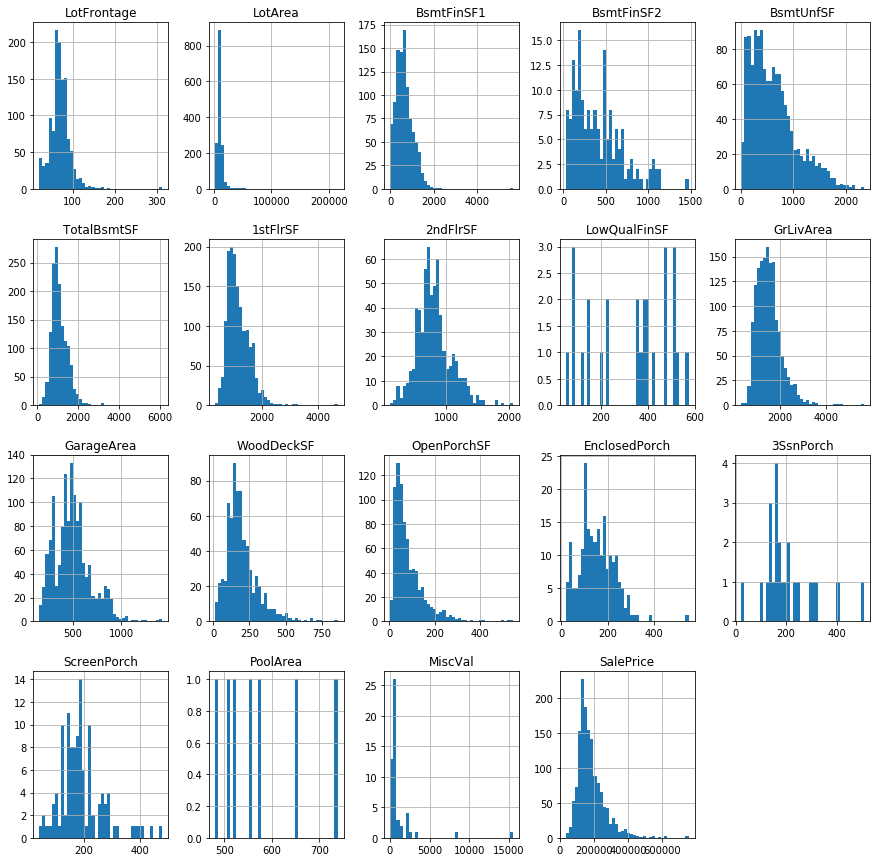

In [9]:
# Plotting histograms for continuous features, ignoring missing values for now

nrows, ncols = 4, 5

df_pos = df_cont[df_cont > 0]

fig = plt.figure(figsize=(15,15))
for i, column in enumerate(df_pos):
    ax = fig.add_subplot(nrows, ncols, i+1)
    df_pos.hist(column, ax=ax, bins=40)
    
plt.show()

## Comments

Preliminary exploratory data analysis on the Kaggle housing prices dataset. I chose to explore the continuous features first (e.g. areas, prices) as they are easier to analyse and manipulate. Many of the features have a lot of missing values, hence the high peaks at 0 for multiple different features. The data also seems to be relatively skewed for various features - some transformation and data cleaning will definitely be needed before using any of this data for any training/ML modelling. Will need to look into methods used to combine categorical and continuous features into one ML prediction model.